# Project Ecommerce

An Ecommerce company based in New York City sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company is trying to decide whether to focus their efforts on their mobile app experience or their website.
SInce the data requires email and addresses of the customers, therefore Data used in this project is artificially generated.

## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame.**

In [6]:
customers = pd.read_csv('Ecommerce Customers')

** Lets check the head of customers**

In [7]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


** Lets check the info of customers**

In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


** Lets check the statistics of customers**

In [9]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Lets compare the Time on Website and Yearly Amount Spent columns.**

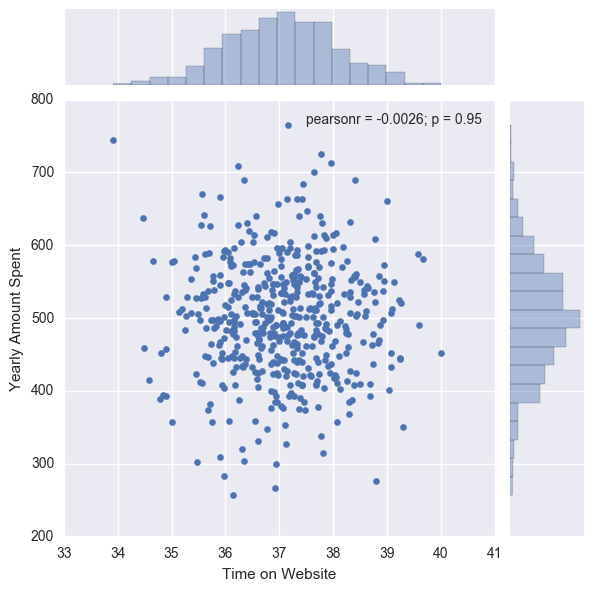

In [11]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

** Do the same but with the Time on App column instead. **

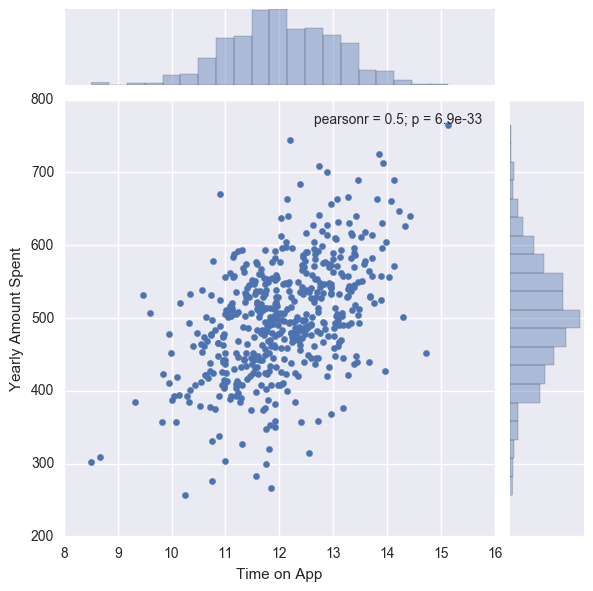

In [13]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

** Lets create a jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

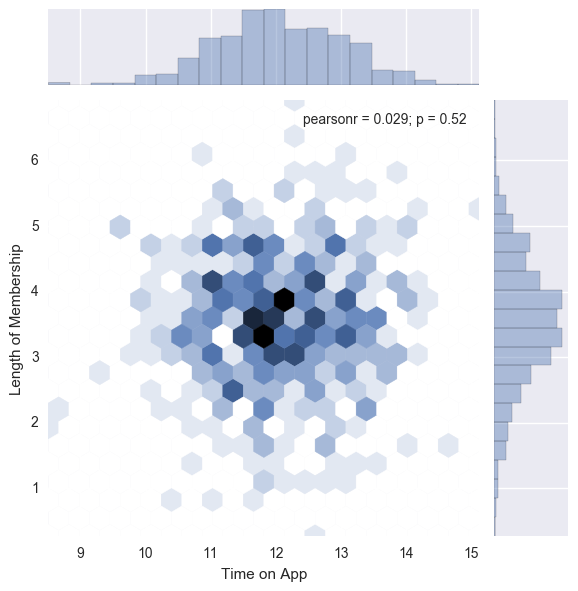

In [14]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

**Let's explore these types of relationships across the entire data set.**

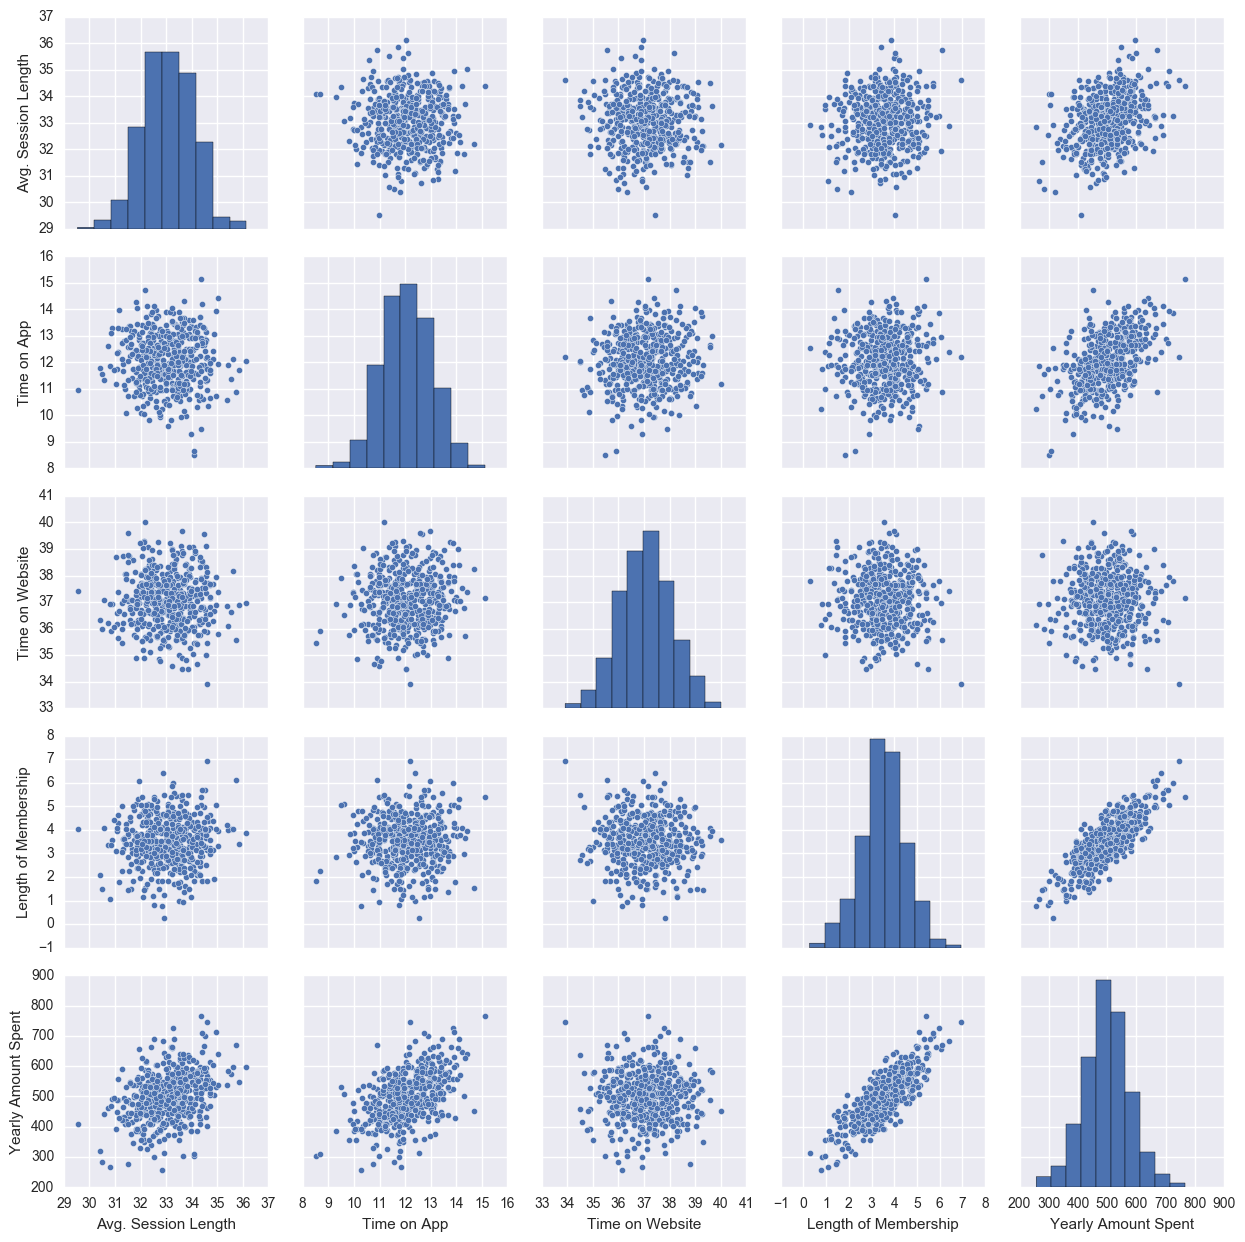

In [15]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [49]:
# Length of Membership

**A linear model plot of  Yearly Amount Spent vs. Length of Membership. **

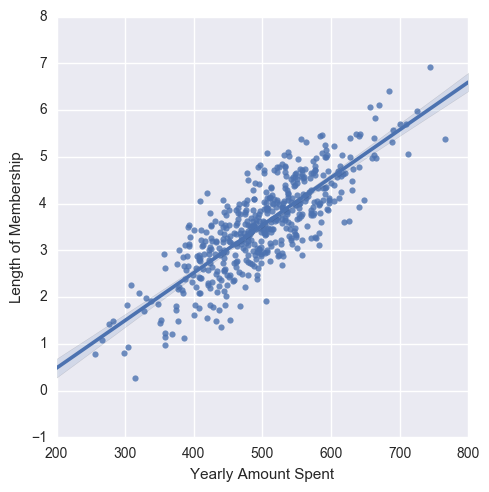

In [16]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers)

C:\Users\Sachin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


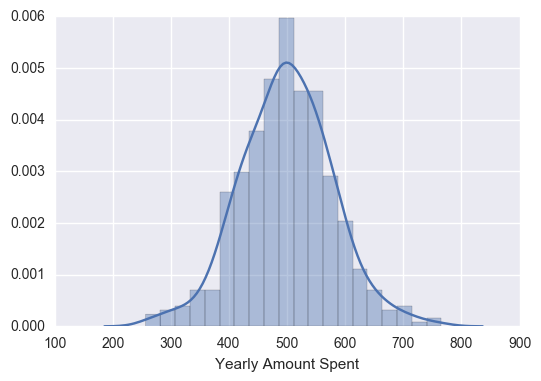

In [25]:
sns.distplot(customers['Yearly Amount Spent'])

**Heatmap of the customers dataframe to check the correlation. **

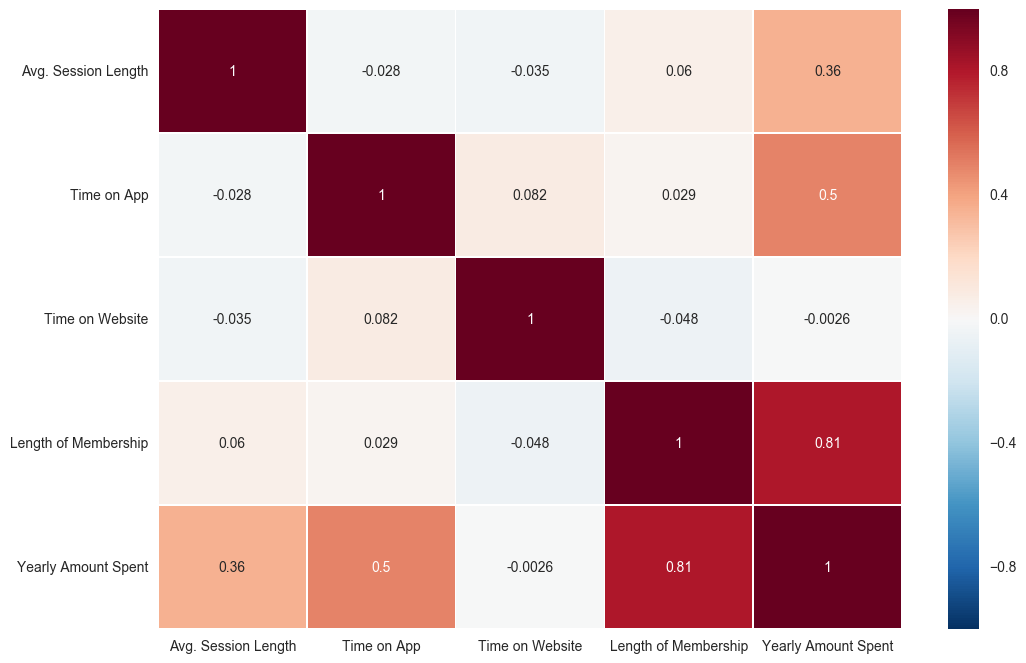

In [27]:
fig = plt.subplots(figsize=(12,8))
sns.heatmap(customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership','Yearly Amount Spent']].corr(),
annot=True,linewidth=0.5)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.


In [17]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [19]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [20]:
y = customers['Yearly Amount Spent']

In [21]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [22]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

** Lets split the data into training and testing sets.**

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Lets Import LinearRegression from sklearn.linear_model **

In [32]:
from sklearn.linear_model import LinearRegression

** Lets Create an instance of a LinearRegression() model named lm.**

In [33]:
lm = LinearRegression()

** Now Train/fit lm on the training data.**

In [34]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** Lets check the coefficients of the model**

In [35]:
lm.coef_

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

In [36]:
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeff'])

In [37]:
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Will use lm.predict() to predict off the X_test set of the data.**

In [39]:
predictions = lm.predict(X_test)

In [40]:
predictions

array([ 456.44186104,  402.72005312,  409.2531539 ,  591.4310343 ,
        590.01437275,  548.82396607,  577.59737969,  715.44428115,
        473.7893446 ,  545.9211364 ,  337.8580314 ,  500.38506697,
        552.93478041,  409.6038964 ,  765.52590754,  545.83973731,
        693.25969124,  507.32416226,  573.10533175,  573.2076631 ,
        397.44989709,  555.0985107 ,  458.19868141,  482.66899911,
        559.2655959 ,  413.00946082,  532.25727408,  377.65464817,
        535.0209653 ,  447.80070905,  595.54339577,  667.14347072,
        511.96042791,  573.30433971,  505.02260887,  565.30254655,
        460.38785393,  449.74727868,  422.87193429,  456.55615271,
        598.10493696,  449.64517443,  615.34948995,  511.88078685,
        504.37568058,  515.95249276,  568.64597718,  551.61444684,
        356.5552241 ,  464.9759817 ,  481.66007708,  534.2220025 ,
        256.28674001,  505.30810714,  520.01844434,  315.0298707 ,
        501.98080155,  387.03842642,  472.97419543,  432.87046

** Scatterplot of the real test values versus the predicted values. **

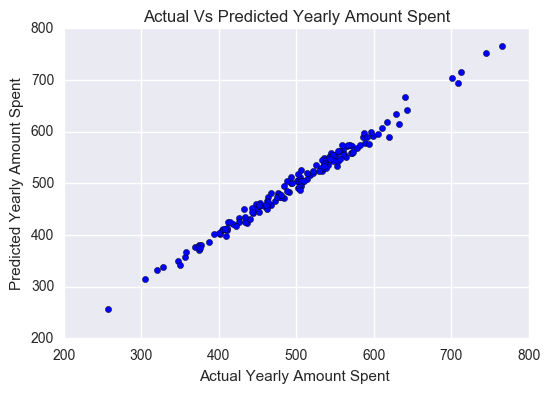

In [41]:
plt.scatter(y_test,predictions)
plt.title("Actual Vs Predicted Yearly Amount Spent")
plt.xlabel("Actual Yearly Amount Spent ")
plt.ylabel("Predicted Yearly Amount Spent")

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. **

In [42]:
from sklearn import metrics

In [52]:
# Mean Absolute Error
metrics.mean_absolute_error(y_test,predictions)

7.228148653430817

In [53]:
# Mean Squared Error
metrics.mean_squared_error(y_test,predictions)

79.813051650974373

In [54]:
# Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test,predictions))

8.9338150669786298

In [55]:
# Variance score (R^2)
metrics.explained_variance_score(y_test,predictions)

0.98907712318896068

## Residuals

We have a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed.**

C:\Users\Sachin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


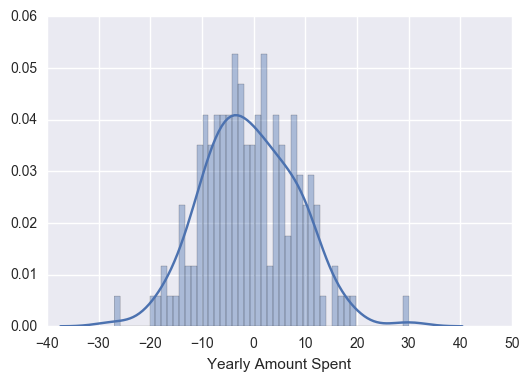

In [50]:
sns.distplot((y_test-predictions),bins=50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.



In [47]:
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficient'])

In [48]:
cdf

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**

Either develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. We should explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!
